In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools

In [388]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati = dati[['Date', 'Close']]
dati = dati.rename(columns = {'Date':'Timestamp', 'Close': 'Price'})
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
dati['Timestamp'] = dati['Timestamp'].dt.strftime('%Y-%m-%d')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'], format='%Y-%m-%d')
dati

,Timestamp,Price
0,2014-09-17,355.957367
1,2014-09-18,328.539368
2,2014-09-19,307.761139
3,2014-09-20,318.758972
4,2014-09-21,310.632446
...,...,...
3503,2024-04-20,59876.710938
3504,2024-04-21,60956.074219
3505,2024-04-22,60919.242188
3506,2024-04-23,62729.296875


In [389]:
# dati = pd.read_csv('Bitcoin (€) da yfinance dal 06-05-2022 alle 21 al 05-05-2024 alle 19 con granularità oraria.csv')
# dati = dati[['Datetime', 'Close']]
# dati = dati.rename(columns = {'Datetime':'Timestamp', 'Close': 'Price'})
# dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
# dati['Timestamp'] = dati['Timestamp'].dt.strftime('%Y-%m-%d %H')
# dati['Timestamp'] = pd.to_datetime(dati['Timestamp'], format='%Y-%m-%d %H')
# dati

In [390]:
data_inizio = '2020-03-01'
data_fine = '2020-09-01'
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1].reset_index(drop=True)
dati

,Timestamp,Price
0,2020-03-01,7748.164551
1,2020-03-02,7959.358398
2,2020-03-03,7862.485352
3,2020-03-04,7861.055176
4,2020-03-05,8089.786133
...,...,...
180,2020-08-28,9695.468750
181,2020-08-29,9664.351562
182,2020-08-30,9824.922852
183,2020-08-31,9785.023438


In [391]:
# data_inizio = '2023-03-01 00'
# data_fine = '2023-06-01 00'
# indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
# indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
# dati = dati[indice_inizio:indice_fine + 1].reset_index(drop=True)
# dati

### Eventuale cambio dati

In [392]:
def calcola_prezzo(t):
    return dati['Price'][t] #1000 - t + 100 * math.sin(2*math.pi * t / 4)

In [393]:
dati['Price'] = dati.index.map(calcola_prezzo)
dati

,Timestamp,Price
0,2020-03-01,7748.164551
1,2020-03-02,7959.358398
2,2020-03-03,7862.485352
3,2020-03-04,7861.055176
4,2020-03-05,8089.786133
...,...,...
180,2020-08-28,9695.468750
181,2020-08-29,9664.351562
182,2020-08-30,9824.922852
183,2020-08-31,9785.023438


### Simulazione

In [394]:
# # Inizializzazione delle variabili
# capitale_iniziale = 1000
# capitale = capitale_iniziale  # Capitale iniziale in euro
# bitcoin_iniziali = 0  # Quantità iniziale di bitcoin
# bitcoin = bitcoin_iniziali
# investimento_iniziale = 50  # Investimento iniziale in euro
# timeframe = 1  # Timeframe in giorni
# soglia_minima_distacco = 0

# # Acquisto iniziale di Bitcoin
# bitcoin += investimento_iniziale / dati['Price'].iloc[0]
# capitale -= investimento_iniziale

# if investimento_iniziale > 0:
#     acquisti = [(dati['Price'].iloc[0], investimento_iniziale)]  # Lista degli acquisti (prezzo, importo)
#     giorni_acquisto = [0]  # Giorni di acquisto
#     azione = 'Acquisto'
# else:
#     acquisti = []
#     giorni_acquisto = []
#     azione = '-'

# ultima_azione = azione

# vendite = []  # Lista delle vendite (prezzo, importo)
# giorni_vendita = []  # Giorni di vendita

# # Creazione della tabella delle transazioni
# transazioni = pd.DataFrame(columns=['Data', 'Numero giorno', 'Prezzo', 'Ultima Azione', 'Azione Attuale', 'Quantità in € Comprata/Venduta', 'Quantità di Bitcoin Comprati/Venduti', 'Capitale', 'Bitcoin Posseduti', 'Valore Totale del Portafoglio'])

# # Aggiungo la transazione numero 0
# nuova_transazione = pd.DataFrame({'Data': [dati['Timestamp'].iloc[0]], 'Numero giorno': [0], 'Prezzo': [dati['Price'].iloc[0]], 'Ultima Azione': ['Acquisto'], 'Azione Attuale': ['Acquisto'], 'Quantità in € Comprata/Venduta': [investimento_iniziale], 'Quantità di Bitcoin Comprati/Venduti': [bitcoin], 'Capitale': [capitale], 'Bitcoin Posseduti': [bitcoin], 'Valore Totale del Portafoglio': [capitale + bitcoin * dati['Price'].iloc[0]]})
# transazioni = pd.concat([transazioni, nuova_transazione])

# # Simulazione dell'algoritmo di trading
# for i in range(1, len(dati['Price'])):
#     if i % timeframe == 0:
#         valore_attuale = bitcoin * dati['Price'].iloc[i]
#         if valore_attuale > investimento_iniziale:
#             # Vendita
#             differenza = valore_attuale - investimento_iniziale
#             bitcoin_da_vendere = differenza / dati['Price'].iloc[i]
#             prezzo_medio_pesato_acquisti = sum(prezzo * importo for prezzo, importo in acquisti) / sum(importo for prezzo, importo in acquisti)
#             prezzo_medio_pesato_vendite = (sum(prezzo * importo for prezzo, importo in vendite) + dati['Price'].iloc[i] * differenza) / (sum(importo for prezzo, importo in vendite) + differenza) if vendite else dati['Price'].iloc[i]
#             if prezzo_medio_pesato_vendite > prezzo_medio_pesato_acquisti * (1 + soglia_minima_distacco) and bitcoin_da_vendere > 0:
#                 if ultima_azione == 'Acquisto':
#                     vendite = []
#                 bitcoin -= bitcoin_da_vendere
#                 capitale += differenza
#                 vendite.append((dati['Price'].iloc[i], differenza))
#                 giorni_vendita.append(i)
#                 azione = 'Vendita'
#                 ultima_azione = azione
#             else:
#                  azione = '-'
#         else:
#             # Acquisto
#             differenza = investimento_iniziale - valore_attuale
#             bitcoin_da_acquistare = differenza / dati['Price'].iloc[i]
#             if bitcoin_da_acquistare > 0:
#                 if ultima_azione == 'Vendita':
#                     acquisti = []
#                 bitcoin += bitcoin_da_acquistare
#                 capitale -= differenza
#                 acquisti.append((dati['Price'].iloc[i], differenza))
#                 giorni_acquisto.append(i)
#                 azione = 'Acquisto'
#                 ultima_azione = azione
#             else:
#                  azione = '-'
#     else:
#          azione = '-'

#     # Alla fine di ogni timeframe giorni potrei aggiornare la soglia minima di distacco in modo che sia opportuna in base ai dati visti finora
    
         
#     if azione == 'Acquisto':
#         quantita_comprata_o_venduta = differenza
#         quantita_bitcoin_comprati_o_venduti = bitcoin_da_acquistare
#     elif azione == 'Vendita':
#         quantita_comprata_o_venduta = differenza
#         quantita_bitcoin_comprati_o_venduti = bitcoin_da_vendere
#     else:
#         quantita_comprata_o_venduta = 0
#         quantita_bitcoin_comprati_o_venduti = 0
    
#     nuova_transazione = pd.DataFrame({'Data': [dati['Timestamp'].iloc[i]], 'Numero giorno': i, 'Prezzo': [dati['Price'].iloc[i]], 'Ultima Azione': [ultima_azione], 'Azione Attuale': [azione], 'Quantità in € Comprata/Venduta': [quantita_comprata_o_venduta], 'Quantità di Bitcoin Comprati/Venduti': [quantita_bitcoin_comprati_o_venduti], 'Capitale': [capitale], 'Bitcoin Posseduti': [bitcoin], 'Valore Totale del Portafoglio': [capitale + bitcoin * dati['Price'].iloc[i]]})
#     transazioni = pd.concat([transazioni, nuova_transazione])

# # Calcolo del rendimento del portafoglio
# rendimento = (capitale + bitcoin * dati['Price'].iloc[-1]) / (capitale_iniziale + bitcoin_iniziali * dati['Price'].iloc[0])

# # Grafico dell'andamento dei prezzi
# plt.figure(figsize=(20, 7))
# plt.grid(True)
# plt.plot(dati['Timestamp'], dati['Price'], label = 'Prezzi')
# plt.scatter(dati['Timestamp'][giorni_acquisto], [dati['Price'].iloc[i] for i in giorni_acquisto], color='green', label = 'Acquisti')
# plt.scatter(dati['Timestamp'][giorni_vendita], [dati['Price'].iloc[i] for i in giorni_vendita], color='red', label = 'Vendite')
# plt.legend()
# plt.show()

In [395]:
# print(f"Rendimento del portafoglio: {rendimento}")
# print(f"Valore finale del portafoglio in euro: {capitale + bitcoin * dati['Price'].iloc[-1]}")

In [396]:
# giorni_acquisto

In [397]:
# giorni_vendita

In [398]:
# transazioni

In [399]:
# transazioni[transazioni['Azione Attuale'] != '-']

### Simulazione 2

In [430]:
def quanto_acquistare(C_acquisto, variazione_percentuale_acquisto, base_exp_acquisto):
    return C_acquisto * variazione_percentuale_acquisto * base_exp_acquisto**variazione_percentuale_acquisto

def quanto_vendere(C_vendita, variazione_percentuale_vendita, base_exp_vendita):
    return C_vendita * variazione_percentuale_vendita * base_exp_vendita**variazione_percentuale_vendita

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_45552\3114141499.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transazioni = pd.concat([transazioni, nuova_transazione])


Vendite finora: []
Acquisti finora: [(7862.4853515625, 11.535102585767776), (7861.05517578125, 11.698248119546374)]
Media pesata acquisti finora: 7861.765242295617
Vendite finora: [(8089.7861328125, 0.918551782949066)]
Media pesata vendite finora: 8089.7861328125
Acquisti finora: [(8082.73974609375, 0.8656934475533308), (7894.34375, 22.080979352296055), (7121.0341796875, 92.87504572483768), (6952.2060546875, 106.71945809673471)]
Media pesata acquisti finora: 7120.543164268107
Vendite finora: [(6989.2109375, 1.2351159585623663), (7024.82763671875, 2.376169456598571)]
Media pesata vendite finora: 6989.220688939955
Acquisti finora: [(4444.2373046875, 314.6497270979818)]
Media pesata acquisti finora: 4444.2373046875
Vendite finora: [(4993.67724609375, 49.78513998838746)]
Media pesata vendite finora: 4993.67724609375
Vendite finora: []
Acquisti finora: [(4666.3095703125, 294.0922175475341), (4493.08935546875, 199.7985052142456)]
Media pesata acquisti finora: 4596.2350813544135
Vendite finor

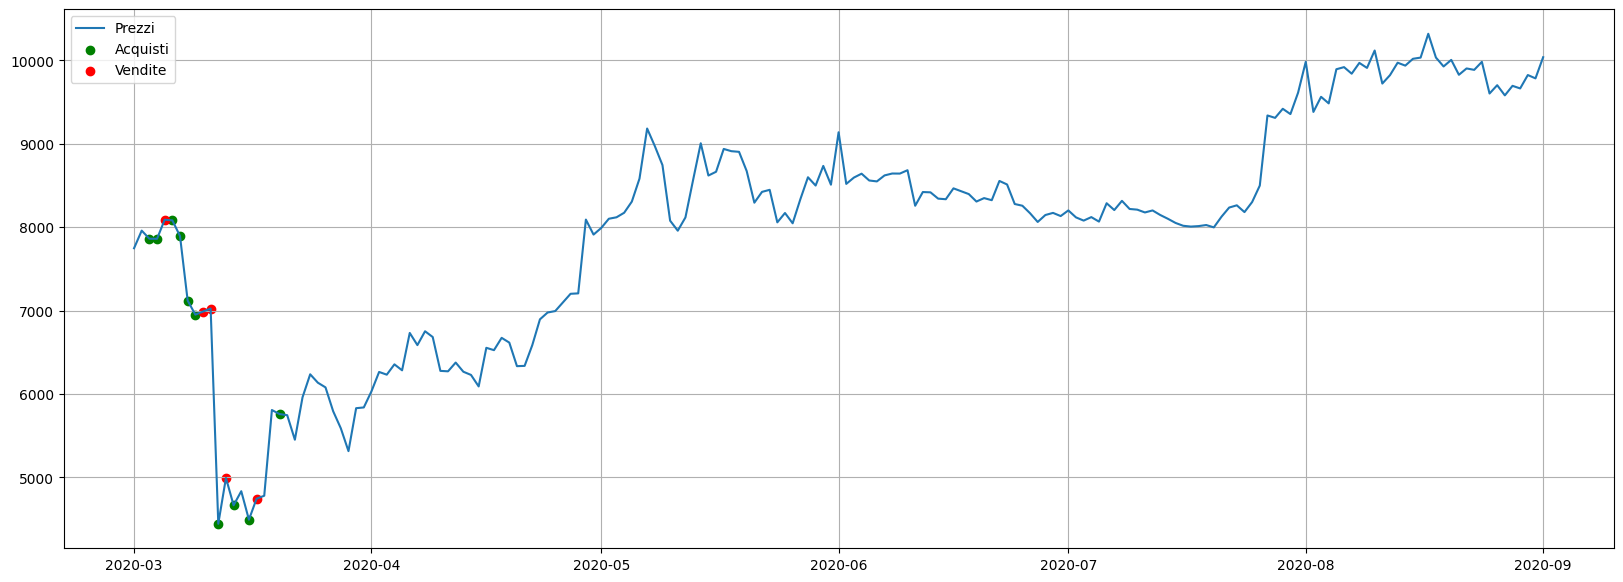

In [420]:
# Inizializzazione delle variabili
capitale_iniziale = 1000 # Capitale iniziale in euro
bitcoin_iniziali = 0  # Quantità iniziale di bitcoin
investimento_iniziale = 0  # Investimento iniziale in euro
timeframe = 1  # Timeframe in giorni
soglia_minima_distacco = 0 # Rappresenta la percentuale minima di differenza che ci dev'essere tra il prezzo attuale e il prezzo medio pesato degli ultimi acquisti per vendere
C_acquisto = 1
C_vendita = 1
giorni_confronto_min_max = 30
acquisto_rispetto_capitale = False # Se è True, le percentuali di acquisto vengono calcolate rispetto al capitale attualmente posseduto, altrimenti rispetto al capitale iniziale
confronto_con_ultimi = False # Se è True, l'eventuale vendita avviene se le ultime vendite consecutive (compresa quella nuova eventuale) hanno un prezzo medio pesato sufficiente a battere il prezzo medio pesato degli ultimi acquisti consecutivi; se è False, l'eventuale vendita avviene se il prezzo medio pesato di tutte le vendite effettuate (compresa quella nuova eventuale) è sufficiente a battere il prezzo medio pesato di tutti gli acquisti effettuati
# riferimento_vendita = 3 # La percentuale di vendita sarà linearmente proporzionale alla differenza tra prezzo_attuale/riferimento_vendita e il prezzo_minimo; quindi se è uguale a 1 1a % di vendita viene del 100% se il prezzo attuale è il doppio del prezzo minimo, mentre se è ad esempio 2 la vendita avviene quando il prezzo è il triplo del prezzo minimo
base_exp_acquisto = 1
base_exp_vendita = 1

capitale = capitale_iniziale
bitcoin = bitcoin_iniziali

# Acquisto iniziale di Bitcoin
bitcoin += investimento_iniziale / dati['Price'].iloc[0]
capitale -= investimento_iniziale

if investimento_iniziale > 0:
    acquisti = [(dati['Price'].iloc[0], investimento_iniziale)]  # Lista degli acquisti (prezzo, importo)
    giorni_acquisto = [0]  # Giorni di acquisto
    azione = 'Acquisto'
else:
    acquisti = []
    giorni_acquisto = []
    azione = '-'

acquisti_totali = acquisti.copy()
ultima_azione = azione # ultima_azione è sempre o 'Acquisto' o 'Vendita', tranne il giorno 0 che può essere anche '-'

vendite = []  # Lista delle vendite (prezzo, importo)
vendite_totali = vendite.copy()
giorni_vendita = []  # Giorni di vendita

# Creazione della tabella delle transazioni
transazioni = pd.DataFrame(columns=['Data', 'Numero giorno', 'Prezzo', f'Prezzo min ultimi {giorni_confronto_min_max} giorni', f'Prezzo max ultimi {giorni_confronto_min_max} giorni', 'Ultima Azione', 'Azione Attuale', '% acquisto/vendita', 'Quantità in € Comprata/Venduta', 'Quantità di Bitcoin Comprati/Venduti', 'Capitale', 'Bitcoin Posseduti', 'Valore Totale del Portafoglio'])

# Aggiungo la transazione numero 0
nuova_transazione = pd.DataFrame({'Data': [dati['Timestamp'].iloc[0]], 'Numero giorno': [0], 'Prezzo': [dati['Price'].iloc[0]], f'Prezzo min ultimi {giorni_confronto_min_max} giorni': dati['Price'][0], f'Prezzo max ultimi {giorni_confronto_min_max} giorni': dati['Price'][0], 'Ultima Azione': ultima_azione, 'Azione Attuale': azione, '% acquisto/vendita': '-', 'Quantità in € Comprata/Venduta': [investimento_iniziale], 'Quantità di Bitcoin Comprati/Venduti': [bitcoin], 'Capitale': [capitale], 'Bitcoin Posseduti': [bitcoin], 'Valore Totale del Portafoglio': [capitale + bitcoin * dati['Price'].iloc[0]]})
transazioni = pd.concat([transazioni, nuova_transazione])

# Simulazione dell'algoritmo di trading
for i in range(1, len(dati['Price'])):
    if i > giorni_confronto_min_max:
        prezzo_massimo = dati['Price'].iloc[i-giorni_confronto_min_max:i+1].max() # Per calcolare massimo e minimo in questo caso sto usando tutti i prezzi (fino al momento attuale) a prescindere dal timeframe; in caso contrario, dovrei considerare solo i prezzi visti fino al momento attuale, ma ogni "timeframe" dati
        prezzo_minimo = dati['Price'].iloc[i-giorni_confronto_min_max:i+1].min()
    else:
        prezzo_massimo = dati['Price'].iloc[:i+1].max()
        prezzo_minimo = dati['Price'].iloc[:i+1].min()

    if i % timeframe == 0:
        valore_attuale = bitcoin * dati['Price'].iloc[i]

        if dati['Price'].iloc[i] < dati['Price'].iloc[i - timeframe]: # Acquisto
            if ultima_azione == 'Vendita':
                    print('Acquisti finora:', acquisti)
                    print('Media pesata acquisti finora:', prezzo_medio_pesato_acquisti)
                    acquisti = []

            # print('Lunghezza acquisti:', len(acquisti))
            variazione_percentuale_acquisto = abs((dati['Price'].iloc[i] - prezzo_massimo) / prezzo_massimo)
            percentuale_acquisto = min(quanto_acquistare(C_acquisto, variazione_percentuale_acquisto, base_exp_acquisto), 1)
            if acquisto_rispetto_capitale:
                quantita_da_acquistare = percentuale_acquisto * capitale
            else:
                quantita_da_acquistare = min(percentuale_acquisto * capitale_iniziale, capitale)
            if quantita_da_acquistare > 0:
                bitcoin += quantita_da_acquistare / dati['Price'].iloc[i]
                capitale -= quantita_da_acquistare
                acquisti.append((dati['Price'].iloc[i], quantita_da_acquistare))
                acquisti_totali.append((dati['Price'].iloc[i], quantita_da_acquistare))
                giorni_acquisto.append(i)
                azione = 'Acquisto'
                ultima_azione = azione
            else:
                azione = '-'

        elif dati['Price'].iloc[i] > dati['Price'].iloc[i - timeframe]:  # Vendita
            if ultima_azione == 'Acquisto':
                    print('Vendite finora:', vendite)
                    if vendite:
                        print('Media pesata vendite finora:', prezzo_medio_pesato_vendite)
                    vendite = []
            # print('Lunghezza vendite:', len(vendite))
            variazione_percentuale_vendita = abs((dati['Price'].iloc[i] - prezzo_minimo) / prezzo_minimo)
            percentuale_vendita = min(quanto_vendere(C_vendita, variazione_percentuale_vendita, base_exp_vendita), 1)
            bitcoin_da_vendere = percentuale_vendita * bitcoin # In questo caso non avrebbe senso vendere percentuale_vendita * bitcoin_iniziali perchè quelli iniziali potrebbero essere 0, quindi vendo semplicemente una percentuale dei bitcoin che ho
            prezzo_medio_pesato_acquisti = sum(prezzo * importo for prezzo, importo in acquisti) / sum(importo for prezzo, importo in acquisti) if acquisti else 0
            # print(i, prezzo_medio_pesato_acquisti)
            prezzo_medio_pesato_vendite = (sum(prezzo * importo for prezzo, importo in vendite) + dati['Price'].iloc[i] * bitcoin_da_vendere) / (sum(importo for prezzo, importo in vendite) + bitcoin_da_vendere) if vendite else dati['Price'].iloc[i]
            prezzo_medio_pesato_acquisti_totali = sum(prezzo * importo for prezzo, importo in acquisti_totali) / sum(importo for prezzo, importo in acquisti_totali) if acquisti_totali else 0
            # print(i, prezzo_medio_pesato_acquisti)
            prezzo_medio_pesato_vendite_totali = (sum(prezzo * importo for prezzo, importo in vendite_totali) + dati['Price'].iloc[i] * bitcoin_da_vendere) / (sum(importo for prezzo, importo in vendite_totali) + bitcoin_da_vendere) if vendite_totali else dati['Price'].iloc[i]
            if confronto_con_ultimi and prezzo_medio_pesato_vendite > prezzo_medio_pesato_acquisti * (1 + soglia_minima_distacco) and bitcoin_da_vendere > 0 or not confronto_con_ultimi and prezzo_medio_pesato_vendite_totali > prezzo_medio_pesato_acquisti_totali * (1 + soglia_minima_distacco) and bitcoin_da_vendere > 0:
                capitale += bitcoin_da_vendere * dati['Price'].iloc[i]
                bitcoin -= bitcoin_da_vendere
                vendite.append((dati['Price'].iloc[i], bitcoin_da_vendere * dati['Price'].iloc[i]))
                vendite_totali.append((dati['Price'].iloc[i], bitcoin_da_vendere * dati['Price'].iloc[i]))
                # print(i, prezzo_medio_pesato_vendite)
                giorni_vendita.append(i)
                azione = 'Vendita'
                ultima_azione = azione
            else:
                azione = '-'
        else:
            azione = '-'


    if azione == 'Acquisto':
        perc_acquisto_o_vendita = percentuale_acquisto
        quantita_comprata_o_venduta = quantita_da_acquistare
        quantita_bitcoin_comprati_o_venduti = quantita_da_acquistare / dati['Price'].iloc[i]
    elif azione == 'Vendita':
        perc_acquisto_o_vendita = percentuale_vendita
        quantita_comprata_o_venduta = bitcoin_da_vendere * dati['Price'].iloc[i]
        quantita_bitcoin_comprati_o_venduti = bitcoin_da_vendere
    else:
        perc_acquisto_o_vendita = '-'
        quantita_comprata_o_venduta = 0
        quantita_bitcoin_comprati_o_venduti = 0

    # print(acquisti)

    nuova_transazione = pd.DataFrame({'Data': [dati['Timestamp'].iloc[i]], 'Numero giorno': i, 'Prezzo': [dati['Price'].iloc[i]], f'Prezzo min ultimi {giorni_confronto_min_max} giorni': prezzo_minimo, f'Prezzo max ultimi {giorni_confronto_min_max} giorni': prezzo_massimo, 'Ultima Azione': [ultima_azione], 'Azione Attuale': [azione], '% acquisto/vendita': [perc_acquisto_o_vendita], 'Quantità in € Comprata/Venduta': [quantita_comprata_o_venduta], 'Quantità di Bitcoin Comprati/Venduti': [quantita_bitcoin_comprati_o_venduti], 'Capitale': [capitale], 'Bitcoin Posseduti': [bitcoin], 'Valore Totale del Portafoglio': [capitale + bitcoin * dati['Price'].iloc[i]]})
    transazioni = pd.concat([transazioni, nuova_transazione])

# Calcolo del rendimento del portafoglio
rendimento = (capitale + bitcoin * dati['Price'].iloc[-1]) / (capitale_iniziale + bitcoin_iniziali * dati['Price'].iloc[0])

# Grafico dell'andamento dei prezzi
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.plot(dati['Timestamp'], dati['Price'], label = 'Prezzi')
plt.scatter(dati['Timestamp'][giorni_acquisto], [dati['Price'].iloc[i] for i in giorni_acquisto], color='green', label = 'Acquisti')
plt.scatter(dati['Timestamp'][giorni_vendita], [dati['Price'].iloc[i] for i in giorni_vendita], color='red', label = 'Vendite')
plt.legend()
plt.show()

In [421]:
dati['Price'].std()

1368.8978509093272

In [422]:
acquisti_totali

[(7862.4853515625, 11.535102585767776),
 (7861.05517578125, 11.698248119546374),
 (8082.73974609375, 0.8656934475533308),
 (7894.34375, 22.080979352296055),
 (7121.0341796875, 92.87504572483768),
 (6952.2060546875, 106.71945809673471),
 (4444.2373046875, 314.6497270979818),
 (4666.3095703125, 294.0922175475341),
 (4493.08935546875, 199.7985052142456),
 (5759.60693359375, 54.032797793927735)]

In [423]:
vendite_totali

[(8089.7861328125, 0.918551782949066),
 (6989.2109375, 1.2351159585623663),
 (7024.82763671875, 2.376169456598571),
 (4993.67724609375, 49.78513998838746),
 (4744.93408203125, 54.032797793927735)]

In [424]:
len(transazioni[transazioni['Azione Attuale'] == 'Acquisto']), len(transazioni[transazioni['Azione Attuale'] == 'Vendita'])

(10, 5)

In [425]:
def calcola_rendimento_portafoglio_ideale(capitale_iniziale, bitcoin_iniziali, lista_prezzi):
    capitale = capitale_iniziale
    bitcoin = bitcoin_iniziali
    comprato = False

    for i in range(len(lista_prezzi) - 1):
        # Compra al minimo
        if lista_prezzi[i] < lista_prezzi[i+1] and not comprato:
            bitcoin += capitale / lista_prezzi[i]
            capitale = 0
            comprato = True
            # print(f'Bitcoin posseduti: {bitcoin}')
        # Vende al massimo
        elif lista_prezzi[i] > lista_prezzi[i+1] and comprato:
            capitale += bitcoin * lista_prezzi[i]
            bitcoin = 0
            comprato = False
            # print(f'Capitale posseduto: {capitale}')

    # Vende i bitcoin rimasti all'ultimo prezzo
    if comprato:
        capitale += bitcoin * lista_prezzi.iloc[-1]
        bitcoin = 0
        # print(f'Capitale posseduto: {capitale}')
        # print(f'Bitcoin posseduti: {bitcoin}')

    valore_iniziale = capitale_iniziale + bitcoin_iniziali * lista_prezzi[0]
    valore_finale = capitale + bitcoin * lista_prezzi.iloc[-1]


    rendimento = valore_finale / valore_iniziale

    return [rendimento, valore_finale]

In [426]:
rendimento_ideale, portafoglio_finale_ideale = calcola_rendimento_portafoglio_ideale(capitale_iniziale, bitcoin_iniziali, dati['Price'])
print('Rendimento ideale:', rendimento_ideale)
print('Portafoglio finale ideale in euro:', portafoglio_finale_ideale)

Rendimento ideale: 11.157643238313565
Portafoglio finale ideale in euro: 11157.643238313565


In [427]:
print(f"Rendimento del portafoglio: {rendimento}")
print(f'Punteggio rendimento: {round(rendimento / rendimento_ideale *100, 2)}%')
print(f"Valore finale del portafoglio in euro: {capitale + bitcoin * dati['Price'].iloc[-1]}")

Rendimento del portafoglio: 2.0071097972110072
Punteggio rendimento: 17.99%
Valore finale del portafoglio in euro: 2007.1097972110072


In [428]:
transazioni[:20]

,Data,Numero giorno,Prezzo,Prezzo min ultimi 30 giorni,Prezzo max ultimi 30 giorni,Ultima Azione,Azione Attuale,% acquisto/vendita,Quantità in € Comprata/Venduta,Quantità di Bitcoin Comprati/Venduti,Capitale,Bitcoin Posseduti,Valore Totale del Portafoglio
0,2020-03-01,0,7748.164551,7748.164551,7748.164551,-,-,-,0,0.000000,1000,0.000000,1000.000000
0,2020-03-02,1,7959.358398,7748.164551,7959.358398,-,-,-,0,0.000000,1000,0.000000,1000.000000
0,2020-03-03,2,7862.485352,7748.164551,7959.358398,Acquisto,Acquisto,0.011535,11.535103,0.001467,988.464897,0.001467,1000.000000
0,2020-03-04,3,7861.055176,7748.164551,7959.358398,Acquisto,Acquisto,0.011698,11.698248,0.001488,976.766649,0.002955,999.997902
0,2020-03-05,4,8089.786133,7748.164551,8089.786133,Vendita,Vendita,0.038422,0.918552,0.000114,977.685201,0.002842,1000.673855
0,2020-03-06,5,8082.739746,7748.164551,8089.786133,Acquisto,Acquisto,0.000866,0.865693,0.000107,976.819508,0.002949,1000.653831
0,2020-03-07,6,7894.343750,7748.164551,8089.786133,Acquisto,Acquisto,0.022081,22.080979,0.002797,954.738528,0.005746,1000.098291
0,2020-03-08,7,7121.034180,7121.034180,8089.786133,Acquisto,Acquisto,0.092875,92.875046,0.013042,861.863483,0.018788,995.654965
0,2020-03-09,8,6952.206055,6952.206055,8089.786133,Acquisto,Acquisto,0.106719,106.719458,0.015350,755.144024,0.034139,992.482987
0,2020-03-10,9,6989.210938,6952.206055,8089.786133,Vendita,Vendita,0.005176,1.235116,0.000177,756.37914,0.033962,993.746284


In [429]:
transazioni[transazioni['Azione Attuale'] != '-'][:20]

,Data,Numero giorno,Prezzo,Prezzo min ultimi 30 giorni,Prezzo max ultimi 30 giorni,Ultima Azione,Azione Attuale,% acquisto/vendita,Quantità in € Comprata/Venduta,Quantità di Bitcoin Comprati/Venduti,Capitale,Bitcoin Posseduti,Valore Totale del Portafoglio
0,2020-03-03,2,7862.485352,7748.164551,7959.358398,Acquisto,Acquisto,0.011535,11.535103,0.001467,988.464897,0.001467,1000.000000
0,2020-03-04,3,7861.055176,7748.164551,7959.358398,Acquisto,Acquisto,0.011698,11.698248,0.001488,976.766649,0.002955,999.997902
0,2020-03-05,4,8089.786133,7748.164551,8089.786133,Vendita,Vendita,0.038422,0.918552,0.000114,977.685201,0.002842,1000.673855
0,2020-03-06,5,8082.739746,7748.164551,8089.786133,Acquisto,Acquisto,0.000866,0.865693,0.000107,976.819508,0.002949,1000.653831
0,2020-03-07,6,7894.343750,7748.164551,8089.786133,Acquisto,Acquisto,0.022081,22.080979,0.002797,954.738528,0.005746,1000.098291
0,2020-03-08,7,7121.034180,7121.034180,8089.786133,Acquisto,Acquisto,0.092875,92.875046,0.013042,861.863483,0.018788,995.654965
0,2020-03-09,8,6952.206055,6952.206055,8089.786133,Acquisto,Acquisto,0.106719,106.719458,0.015350,755.144024,0.034139,992.482987
0,2020-03-10,9,6989.210938,6952.206055,8089.786133,Vendita,Vendita,0.005176,1.235116,0.000177,756.37914,0.033962,993.746284
0,2020-03-11,10,7024.827637,6952.206055,8089.786133,Vendita,Vendita,0.00996,2.376169,0.000338,758.75531,0.033624,994.955896
0,2020-03-12,11,4444.237305,4444.237305,8089.786133,Acquisto,Acquisto,0.31465,314.649727,0.070799,444.105583,0.104423,908.186942


### Simulazione 2 con parametri dinamici e forza bruta

In [ ]:
def quanto_acquistare(C_acquisto, variazione_percentuale_acquisto, base_exp_acquisto):
    return C_acquisto * variazione_percentuale_acquisto * base_exp_acquisto**variazione_percentuale_acquisto

def quanto_vendere(C_vendita, variazione_percentuale_vendita, base_exp_vendita):
    return C_vendita * variazione_percentuale_vendita * base_exp_vendita**variazione_percentuale_vendita

In [ ]:
# Parametri fissi
capitale_iniziale = 1000 # Capitale iniziale in euro
bitcoin_iniziali = 0  # Quantità iniziale di bitcoin
investimento_iniziale = 0  # Investimento iniziale in euro
timeframe = 1  # Timeframe in giorni

# Parametri dinamici (nel senso che il loro valore cambia all'interno della simulazione stessa; con forza bruta nel senso che a ogni iterazione scelgo il valore migliore per ognuno tra quelli disponibili nella relativa lista, esplorando a ogni iterazione qual è la combinazione migliore)
soglia_minima_distacco_values = [0, 0.1, 0.2] # Rappresenta la percentuale minima di differenza che ci dev'essere tra il prezzo attuale e il prezzo medio pesato degli ultimi acquisti per vendere
C_acquisto_values = [1, 1.5]
C_vendita_values = [1, 1.5]
giorni_confronto_min_max_values = [2, 10, 30]
acquisto_rispetto_capitale_values = [True, False] # Se è True, le percentuali di acquisto vengono calcolate rispetto al capitale attualmente posseduto, altrimenti rispetto al capitale iniziale
confronto_con_ultimi_values = [True, False] # Se è True, l'eventuale vendita avviene se le ultime vendite consecutive (compresa quella nuova eventuale) hanno un prezzo medio pesato sufficiente a battere il prezzo medio pesato degli ultimi acquisti consecutivi; se è False, l'eventuale vendita avviene se il prezzo medio pesato di tutte le vendite effettuate (compresa quella nuova eventuale) è sufficiente a battere il prezzo medio pesato di tutti gli acquisti effettuati
# riferimento_vendita = 3 # La percentuale di vendita sarà linearmente proporzionale alla differenza tra prezzo_attuale/riferimento_vendita e il prezzo_minimo; quindi se è uguale a 1 1a % di vendita viene del 100% se il prezzo attuale è il doppio del prezzo minimo, mentre se è ad esempio 2 la vendita avviene quando il prezzo è il triplo del prezzo minimo
base_exp_acquisto_values = [1, 1.5]
base_exp_vendita_values = [1, 1.5]

# Inizializzo i parametri dinamici al valore che avranno il giorno 0 (che in realtà non verranno usati, ma mi servono per vedere nella tabella finale se e come i valori successivi cambiano nel tempo rispetto a questi)
soglia_minima_distacco = 0
C_acquisto = 1
C_vendita = 1
giorni_confronto_min_max = 30
acquisto_rispetto_capitale = False
confronto_con_ultimi = True
base_exp_acquisto = 1
base_exp_vendita = 1



capitale = capitale_iniziale
bitcoin = bitcoin_iniziali
# Acquisto iniziale di Bitcoin
bitcoin += investimento_iniziale / dati['Price'].iloc[0]
capitale -= investimento_iniziale

if investimento_iniziale > 0:
    acquisti = [(dati['Price'].iloc[0], investimento_iniziale)]  # Lista degli acquisti (prezzo, importo)
    giorni_acquisto = [0]  # Giorni di acquisto
    azione = 'Acquisto'
else:
    acquisti = []
    giorni_acquisto = []
    azione = '-'

acquisti_totali = acquisti.copy()
ultima_azione = azione # ultima_azione è sempre o 'Acquisto' o 'Vendita', tranne il giorno 0 che può essere anche '-'

vendite = []  # Lista delle vendite (prezzo, importo)
vendite_totali = vendite.copy()
giorni_vendita = []  # Giorni di vendita

# Creazione della tabella delle transazioni
transazioni = pd.DataFrame(columns=['Soglia minima distacco', 'C_acquisto', 'C_vendita', 'Giorni confronto min max', 'Acquisto rispetto capitale', 'Confronto con ultimi', 'Base exp acquisto', 'Base exp vendita', 'Data', 'Numero giorno', 'Prezzo', f'Prezzo min ultimi {giorni_confronto_min_max} giorni', f'Prezzo max ultimi {giorni_confronto_min_max} giorni', 'Ultima Azione', 'Azione Attuale', '% acquisto/vendita', 'Quantità in € Comprata/Venduta', 'Quantità di Bitcoin Comprati/Venduti', 'Capitale', 'Bitcoin Posseduti', 'Valore Totale del Portafoglio'])

# Aggiungo la transazione numero 0
nuova_transazione = pd.DataFrame({'Soglia minima distacco': soglia_minima_distacco, 'C_acquisto': C_acquisto, 'C_vendita':C_vendita, 'Giorni confronto min max':giorni_confronto_min_max, 'Acquisto rispetto capitale':acquisto_rispetto_capitale, 'Confronto con ultimi':confronto_con_ultimi, 'Base exp acquisto':base_exp_acquisto, 'Base exp vendita':base_exp_vendita, 'Data': [dati['Timestamp'].iloc[0]], 'Numero giorno': [0], 'Prezzo': [dati['Price'].iloc[0]], f'Prezzo min ultimi {giorni_confronto_min_max} giorni': dati['Price'][0], f'Prezzo max ultimi {giorni_confronto_min_max} giorni': dati['Price'][0], 'Ultima Azione': ultima_azione, 'Azione Attuale': azione, '% acquisto/vendita': '-', 'Quantità in € Comprata/Venduta': [investimento_iniziale], 'Quantità di Bitcoin Comprati/Venduti': [bitcoin], 'Capitale': [capitale], 'Bitcoin Posseduti': [bitcoin], 'Valore Totale del Portafoglio': [capitale + bitcoin * dati['Price'].iloc[0]]})
transazioni = pd.concat([transazioni, nuova_transazione])




# Simulazione dell'algoritmo di trading
for i in range(1, len(dati['Price'])):
    for params in itertools.product():
        soglia_minima_distacco = 
        C_acquisto = 
        C_vendita = 
        giorni_confronto_min_max = 
        acquisto_rispetto_capitale = 
        confronto_con_ultimi = 
        base_exp_acquisto = 
        base_exp_vendita = 


        if i > giorni_confronto_min_max:
            prezzo_massimo = dati['Price'].iloc[i-giorni_confronto_min_max:i+1].max() # Per calcolare massimo e minimo in questo caso sto usando tutti i prezzi (fino al momento attuale) a prescindere dal timeframe; in caso contrario, dovrei considerare solo i prezzi visti fino al momento attuale, ma ogni "timeframe" dati
            prezzo_minimo = dati['Price'].iloc[i-giorni_confronto_min_max:i+1].min()
        else:
            prezzo_massimo = dati['Price'].iloc[:i+1].max()
            prezzo_minimo = dati['Price'].iloc[:i+1].min()

        if i % timeframe == 0:
            valore_attuale = bitcoin * dati['Price'].iloc[i]

            if dati['Price'].iloc[i] < dati['Price'].iloc[i - timeframe]: # Acquisto
                if ultima_azione == 'Vendita':
                        print('Acquisti finora:', acquisti)
                        print('Media pesata acquisti finora:', prezzo_medio_pesato_acquisti)
                        acquisti = []

                # print('Lunghezza acquisti:', len(acquisti))
                variazione_percentuale_acquisto = abs((dati['Price'].iloc[i] - prezzo_massimo) / prezzo_massimo)
                percentuale_acquisto = min(quanto_acquistare(C_acquisto, variazione_percentuale_acquisto, base_exp_acquisto), 1)
                if acquisto_rispetto_capitale:
                    quantita_da_acquistare = percentuale_acquisto * capitale
                else:
                    quantita_da_acquistare = min(percentuale_acquisto * capitale_iniziale, capitale)
                if quantita_da_acquistare > 0:
                    bitcoin += quantita_da_acquistare / dati['Price'].iloc[i]
                    capitale -= quantita_da_acquistare
                    acquisti.append((dati['Price'].iloc[i], quantita_da_acquistare))
                    acquisti_totali.append((dati['Price'].iloc[i], quantita_da_acquistare))
                    giorni_acquisto.append(i)
                    azione = 'Acquisto'
                    ultima_azione = azione
                else:
                    azione = '-'

            elif dati['Price'].iloc[i] > dati['Price'].iloc[i - timeframe]:  # Vendita
                if ultima_azione == 'Acquisto':
                        print('Vendite finora:', vendite)
                        if vendite:
                            print('Media pesata vendite finora:', prezzo_medio_pesato_vendite)
                        vendite = []
                # print('Lunghezza vendite:', len(vendite))
                variazione_percentuale_vendita = abs((dati['Price'].iloc[i] - prezzo_minimo) / prezzo_minimo)
                percentuale_vendita = min(quanto_vendere(C_vendita, variazione_percentuale_vendita, base_exp_vendita), 1)
                bitcoin_da_vendere = percentuale_vendita * bitcoin # In questo caso non avrebbe senso vendere percentuale_vendita * bitcoin_iniziali perchè quelli iniziali potrebbero essere 0, quindi vendo semplicemente una percentuale dei bitcoin che ho
                prezzo_medio_pesato_acquisti = sum(prezzo * importo for prezzo, importo in acquisti) / sum(importo for prezzo, importo in acquisti) if acquisti else 0
                # print(i, prezzo_medio_pesato_acquisti)
                prezzo_medio_pesato_vendite = (sum(prezzo * importo for prezzo, importo in vendite) + dati['Price'].iloc[i] * bitcoin_da_vendere) / (sum(importo for prezzo, importo in vendite) + bitcoin_da_vendere) if vendite else dati['Price'].iloc[i]
                prezzo_medio_pesato_acquisti_totali = sum(prezzo * importo for prezzo, importo in acquisti_totali) / sum(importo for prezzo, importo in acquisti_totali) if acquisti_totali else 0
                # print(i, prezzo_medio_pesato_acquisti)
                prezzo_medio_pesato_vendite_totali = (sum(prezzo * importo for prezzo, importo in vendite_totali) + dati['Price'].iloc[i] * bitcoin_da_vendere) / (sum(importo for prezzo, importo in vendite_totali) + bitcoin_da_vendere) if vendite_totali else dati['Price'].iloc[i]
                if confronto_con_ultimi and prezzo_medio_pesato_vendite > prezzo_medio_pesato_acquisti * (1 + soglia_minima_distacco) and bitcoin_da_vendere > 0 or not confronto_con_ultimi and prezzo_medio_pesato_vendite_totali > prezzo_medio_pesato_acquisti_totali * (1 + soglia_minima_distacco) and bitcoin_da_vendere > 0:
                    capitale += bitcoin_da_vendere * dati['Price'].iloc[i]
                    bitcoin -= bitcoin_da_vendere
                    vendite.append((dati['Price'].iloc[i], bitcoin_da_vendere * dati['Price'].iloc[i]))
                    vendite_totali.append((dati['Price'].iloc[i], bitcoin_da_vendere * dati['Price'].iloc[i]))
                    # print(i, prezzo_medio_pesato_vendite)
                    giorni_vendita.append(i)
                    azione = 'Vendita'
                    ultima_azione = azione
                else:
                    azione = '-'
            else:
                azione = '-'


        if azione == 'Acquisto':
            perc_acquisto_o_vendita = percentuale_acquisto
            quantita_comprata_o_venduta = quantita_da_acquistare
            quantita_bitcoin_comprati_o_venduti = quantita_da_acquistare / dati['Price'].iloc[i]
        elif azione == 'Vendita':
            perc_acquisto_o_vendita = percentuale_vendita
            quantita_comprata_o_venduta = bitcoin_da_vendere * dati['Price'].iloc[i]
            quantita_bitcoin_comprati_o_venduti = bitcoin_da_vendere
        else:
            perc_acquisto_o_vendita = '-'
            quantita_comprata_o_venduta = 0
            quantita_bitcoin_comprati_o_venduti = 0

    # print(acquisti)

    nuova_transazione = pd.DataFrame({'Soglia minima distacco': soglia_minima_distacco, 'C_acquisto': C_acquisto, 'C_vendita':C_vendita, 'Giorni confronto min max':giorni_confronto_min_max, 'Acquisto rispetto capitale':acquisto_rispetto_capitale, 'Confronto con ultimi':confronto_con_ultimi, 'Base exp acquisto':base_exp_acquisto, 'Base exp vendita':base_exp_vendita, 'Data': [dati['Timestamp'].iloc[i]], 'Numero giorno': i, 'Prezzo': [dati['Price'].iloc[i]], f'Prezzo min ultimi {giorni_confronto_min_max} giorni': prezzo_minimo, f'Prezzo max ultimi {giorni_confronto_min_max} giorni': prezzo_massimo, 'Ultima Azione': [ultima_azione], 'Azione Attuale': [azione], '% acquisto/vendita': [perc_acquisto_o_vendita], 'Quantità in € Comprata/Venduta': [quantita_comprata_o_venduta], 'Quantità di Bitcoin Comprati/Venduti': [quantita_bitcoin_comprati_o_venduti], 'Capitale': [capitale], 'Bitcoin Posseduti': [bitcoin], 'Valore Totale del Portafoglio': [capitale + bitcoin * dati['Price'].iloc[i]]})
    transazioni = pd.concat([transazioni, nuova_transazione])

# Calcolo del rendimento del portafoglio
rendimento = (capitale + bitcoin * dati['Price'].iloc[-1]) / (capitale_iniziale + bitcoin_iniziali * dati['Price'].iloc[0])

# Grafico dell'andamento dei prezzi
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.plot(dati['Timestamp'], dati['Price'], label = 'Prezzi')
plt.scatter(dati['Timestamp'][giorni_acquisto], [dati['Price'].iloc[i] for i in giorni_acquisto], color='green', label = 'Acquisti')
plt.scatter(dati['Timestamp'][giorni_vendita], [dati['Price'].iloc[i] for i in giorni_vendita], color='red', label = 'Vendite')
plt.legend()
plt.show()